# 6. PyTorch Transfer Learning

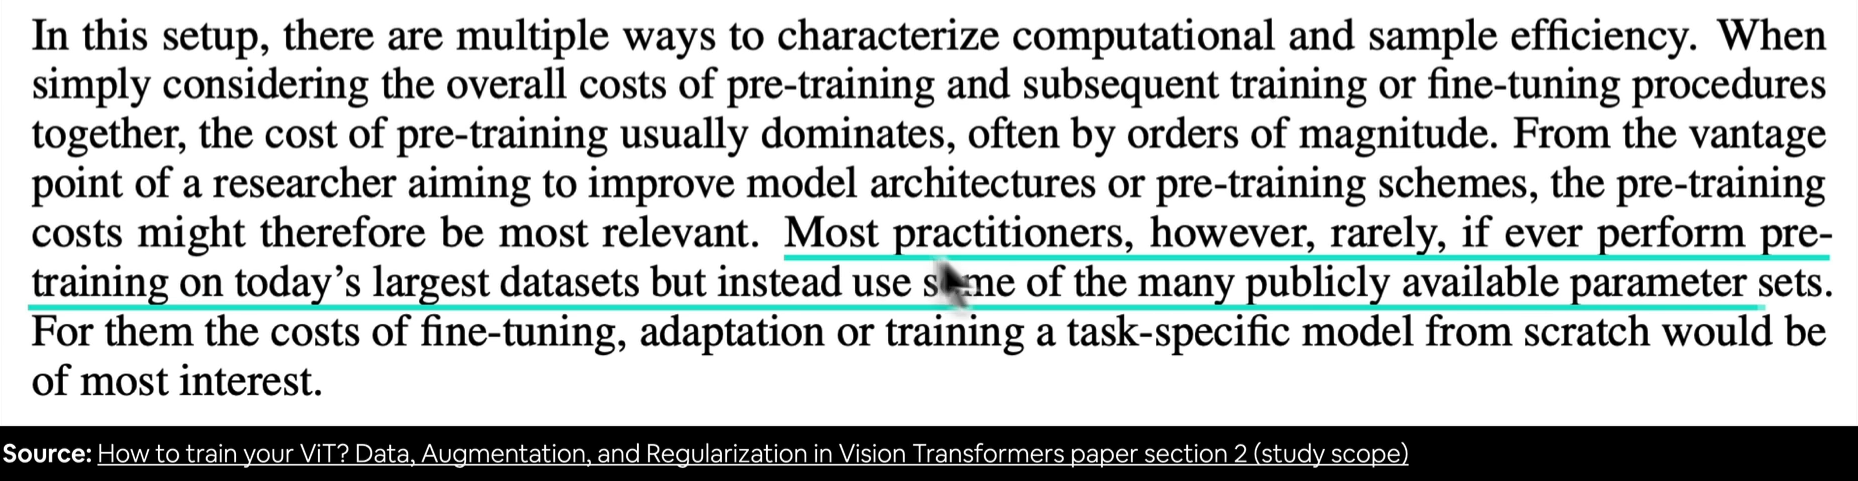

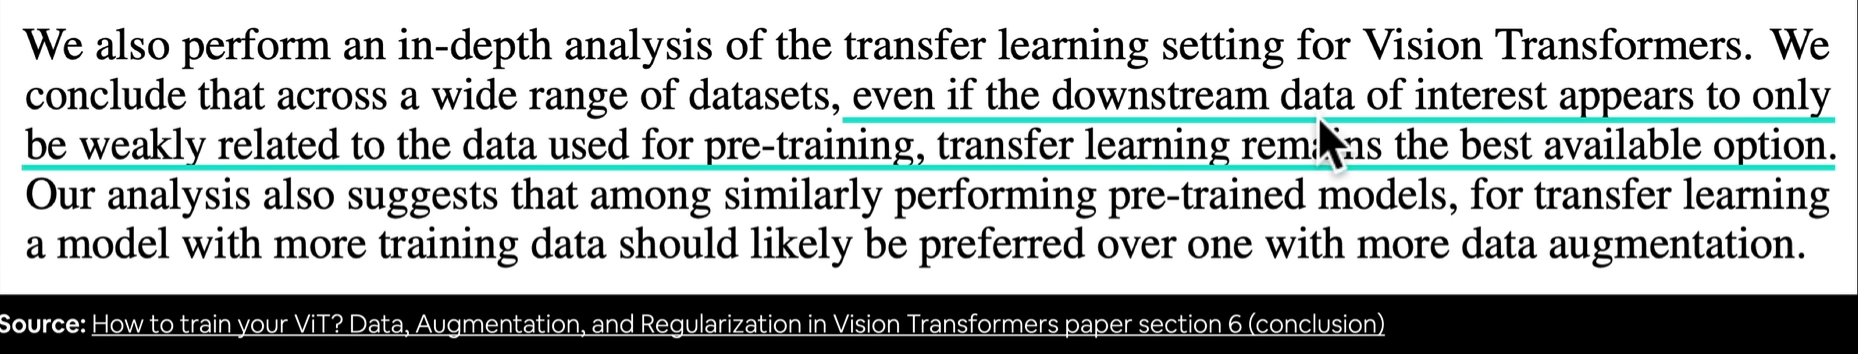

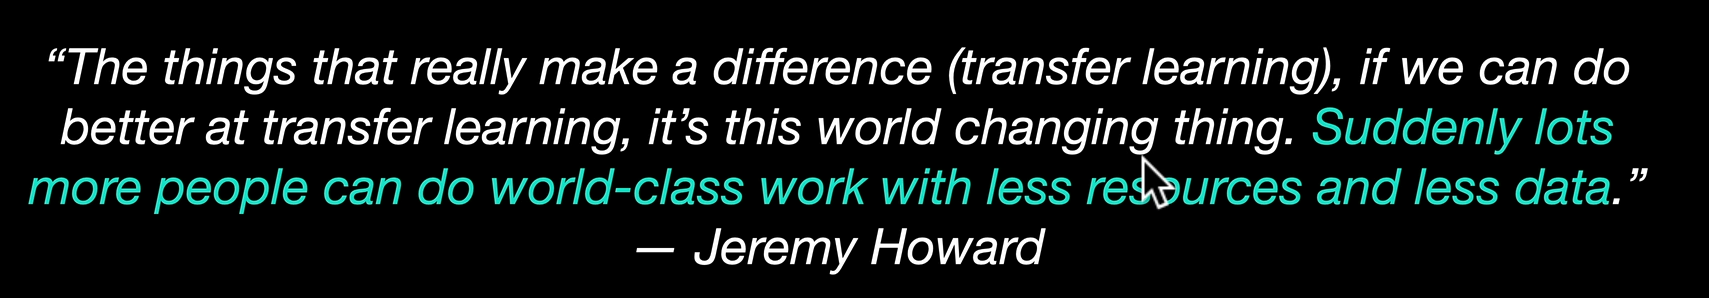

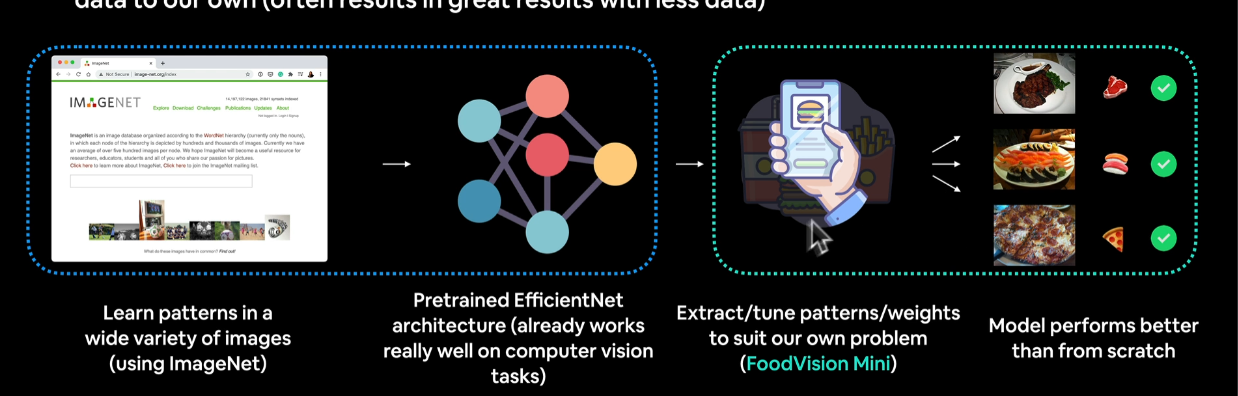

In [1]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)

2.0.0+cu117
0.15.1+cu117


In [2]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
!nvidia-smi

Tue Aug  6 05:14:39 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.107.02             Driver Version: 550.107.02     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   57C    P8             23W /   80W |     796MiB /   8192MiB |     15%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
# from external resources

import os
import zipfile

from pathlib import Path
import requests
from torch import nn
from torchvision import transforms

# setup data path

In [9]:
# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

In [10]:
# setup data path

train_data = image_path/"train"
test_data = image_path/"test"
train_data, test_data

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Create dataloaders


In [11]:

data_manual_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225])
    ])

from going_modular.going_modular import data_setup
batch_size = 3
num_workers = os.cpu_count()

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_data,
                                                                               test_dir=test_data,
                                                                               transform=data_manual_transform,
                                                                               batch_size=batch_size
                                                                               )

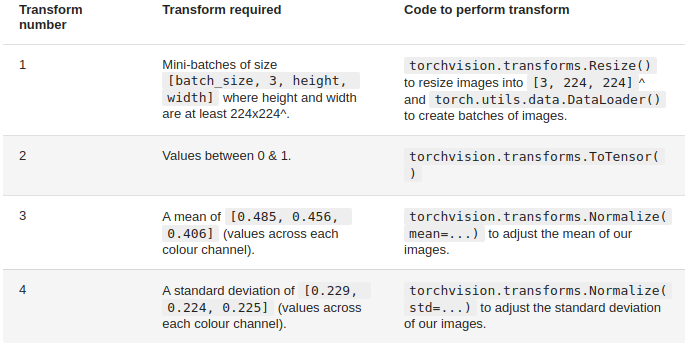

- EfficientNet - B0 to B7 - Larger the number deeeper the network. 
- To automatically create data transform we need to download the EfficientNetB0 weights.

In [12]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT 
# Default = Best available performing weights

print(weights)

auto_transforms = weights.transforms()
print(auto_transforms)

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_data,
                                                                               test_dir=test_data,
                                                                               transform=auto_transforms,
                                                                               batch_size=batch_size
                                                                               )

EfficientNet_B0_Weights.IMAGENET1K_V1
ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)


How to choose the model ?

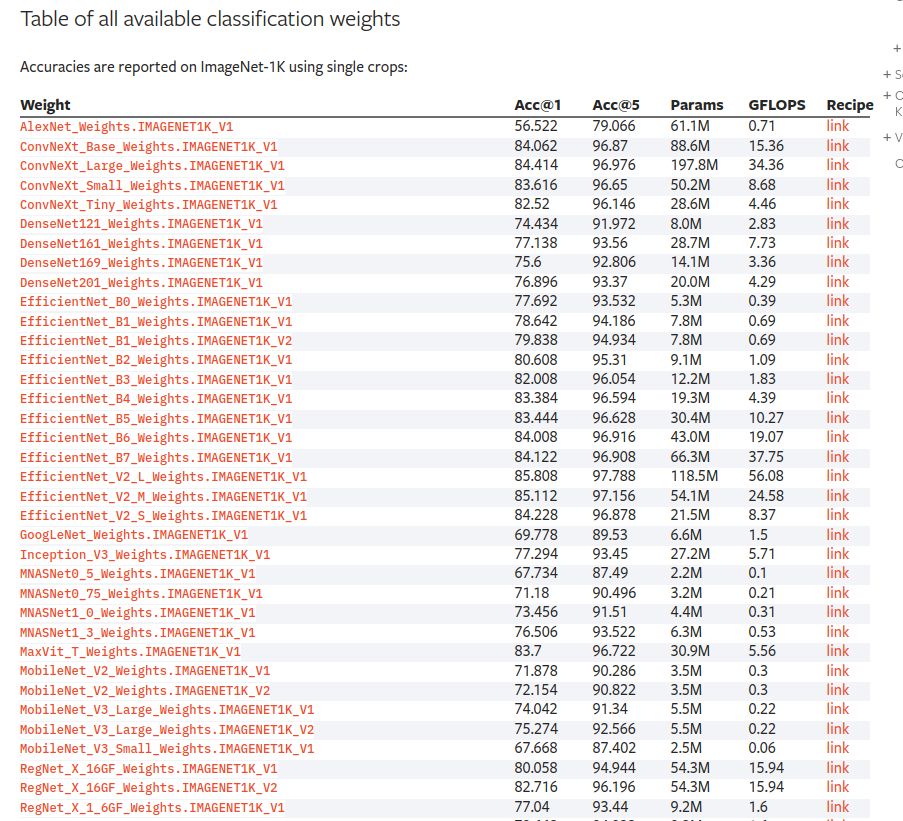

In [13]:
model = torchvision.models.efficientnet_b0(pretrained=True)

/home/ravina/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ravina/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [14]:
effnetb0_weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # default is best available weights

model = torchvision.models.efficientnet_b0(weights=effnetb0_weights).to(device)
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

#### Let's breakdown model into 3 parts ->
1. Model Features -> 
2. Model.avgpool ->
3. Model.classifier Head->
We are going to later faetures and classifie head in order to customize this model.

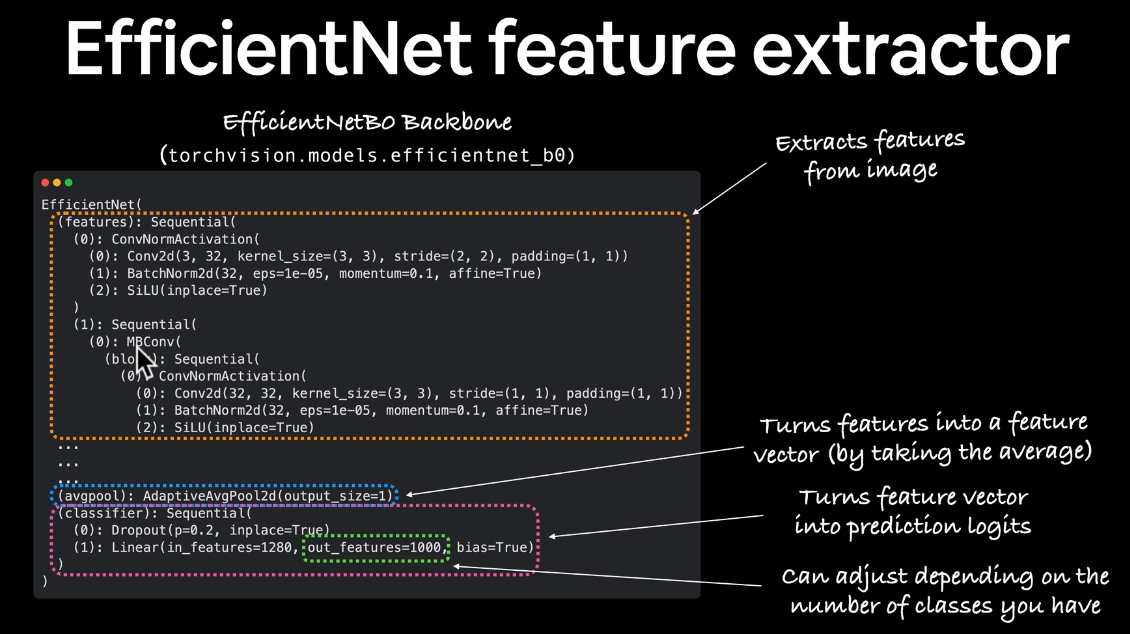

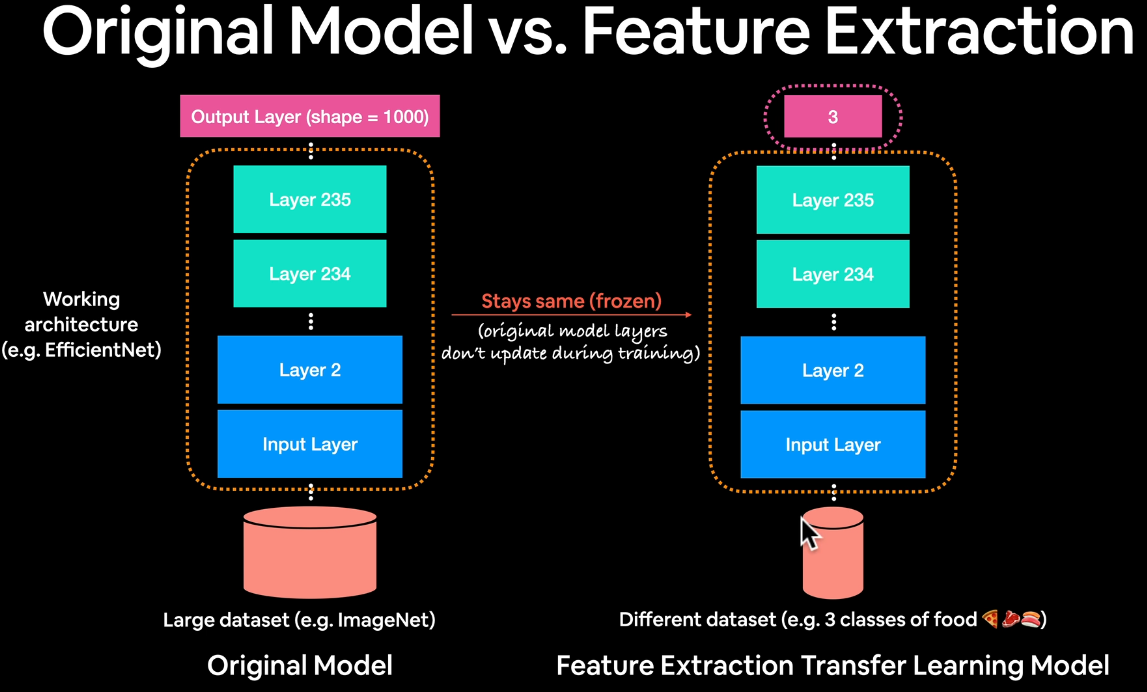

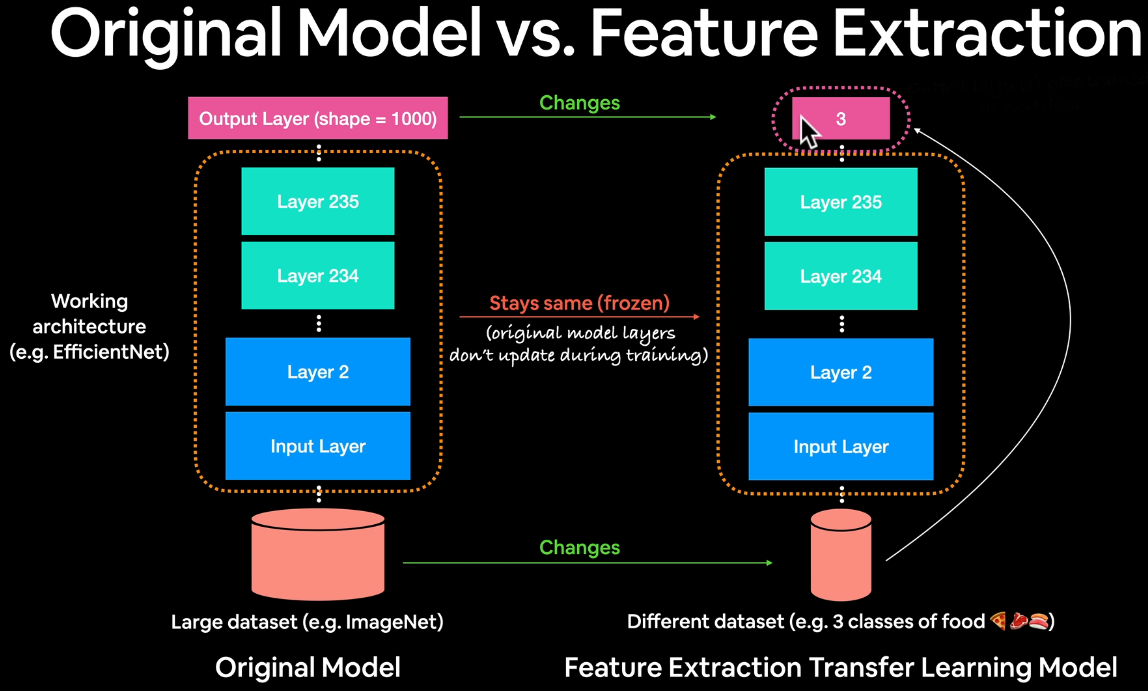

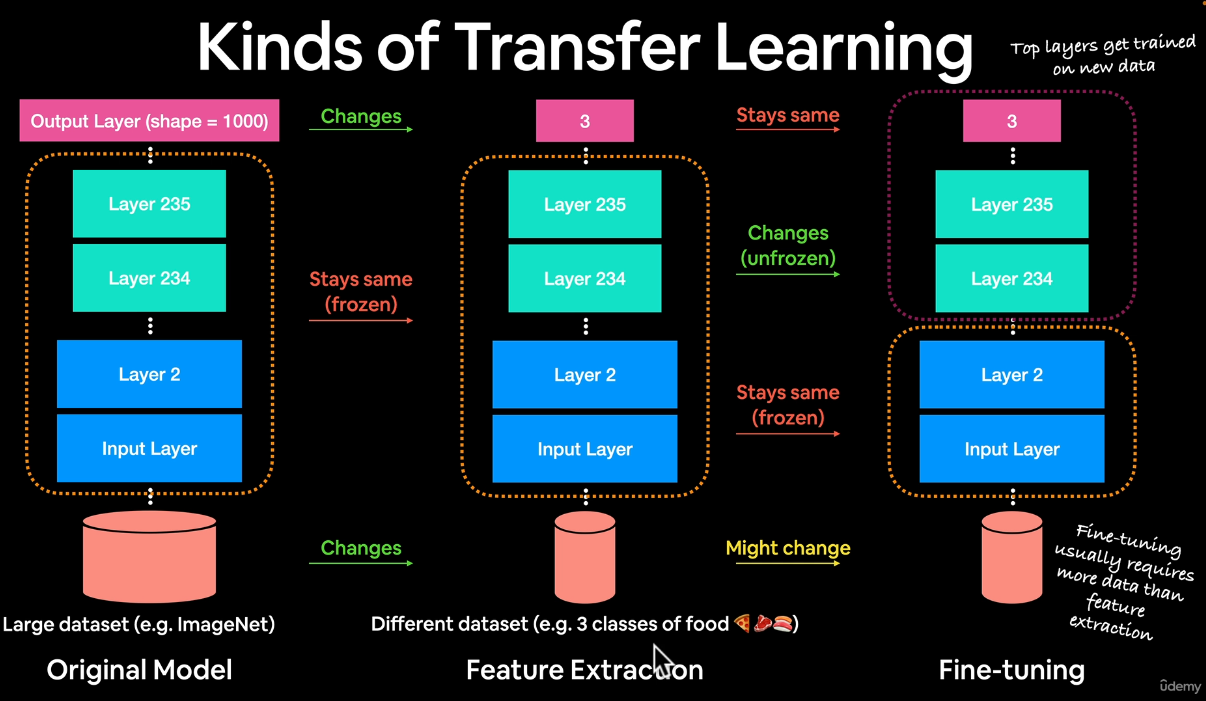

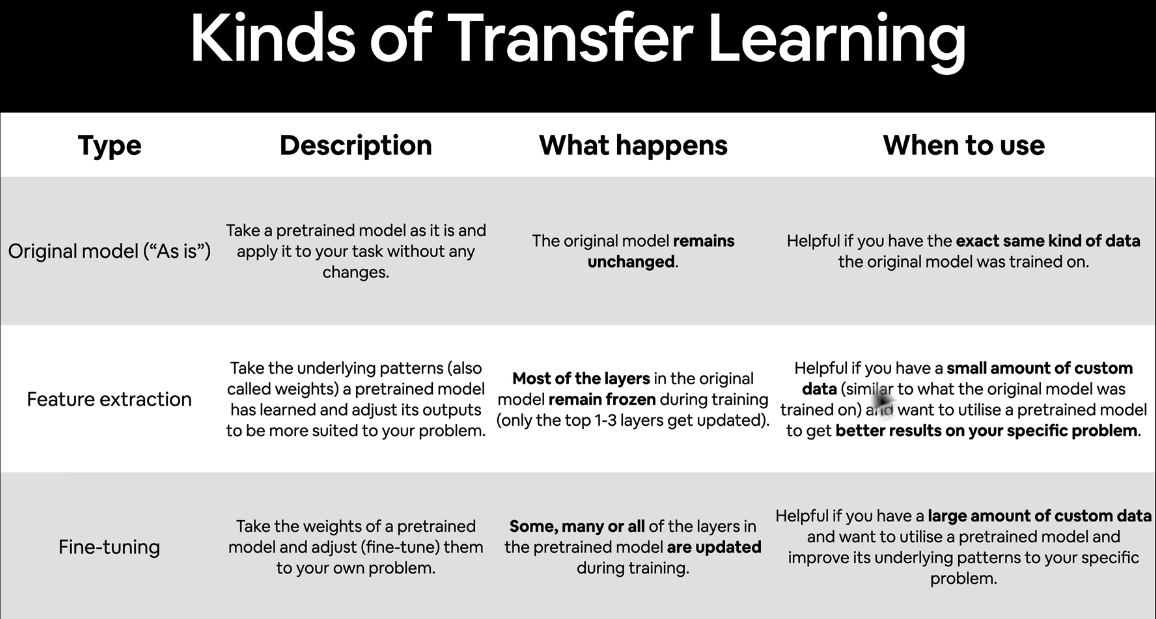

In [15]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [16]:
model.avgpool

AdaptiveAvgPool2d(output_size=1)

In [17]:
model.forward

<bound method EfficientNet.forward of EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
      

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [19]:
# Print summary 
from torchinfo import summary


summary(model=model, 
        input_size=(1, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 1000]            --                   True
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   True
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    864                  True
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    64                   True
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 16, 112,

#### 6. Feature extraction: Frezzing base layer of pretrained/foundational Model + Updating Classifier Head
- Freeze all of the base layers in EffNetB0

In [20]:
for param in model.features:
    print(param)
    break

Conv2dNormActivation(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): SiLU(inplace=True)
)


In [21]:
for param in model.features.parameters():
    param.requires_grad = False

In [22]:
summary(model=model, 
        input_size=(1, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 1000]            --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 1

In [23]:
#list(model.classifier.parameters())
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [24]:
from torch import nn

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True), # regularization - avoid overfitting, 20% neurons are 0 now
    nn.Linear(in_features=1280, out_features=len(class_names), bias=True)
    # this will instantiate with random weights hence, need to decalre manual seed for results for re-producinility
).to(device=device)
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=3, bias=True)
)

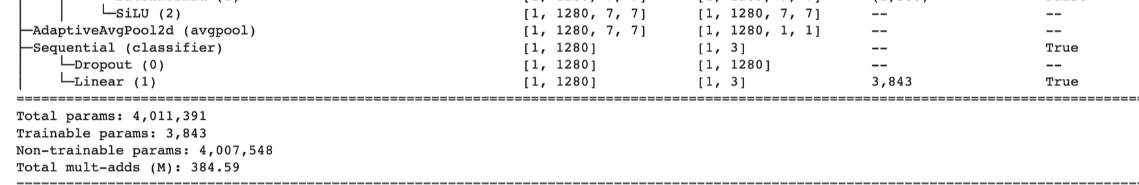

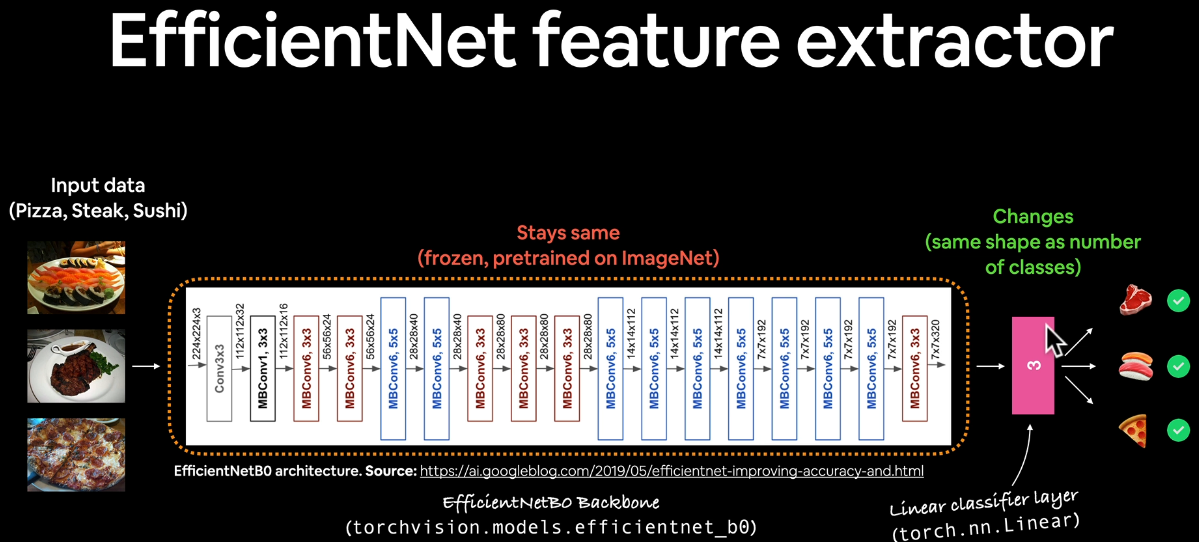

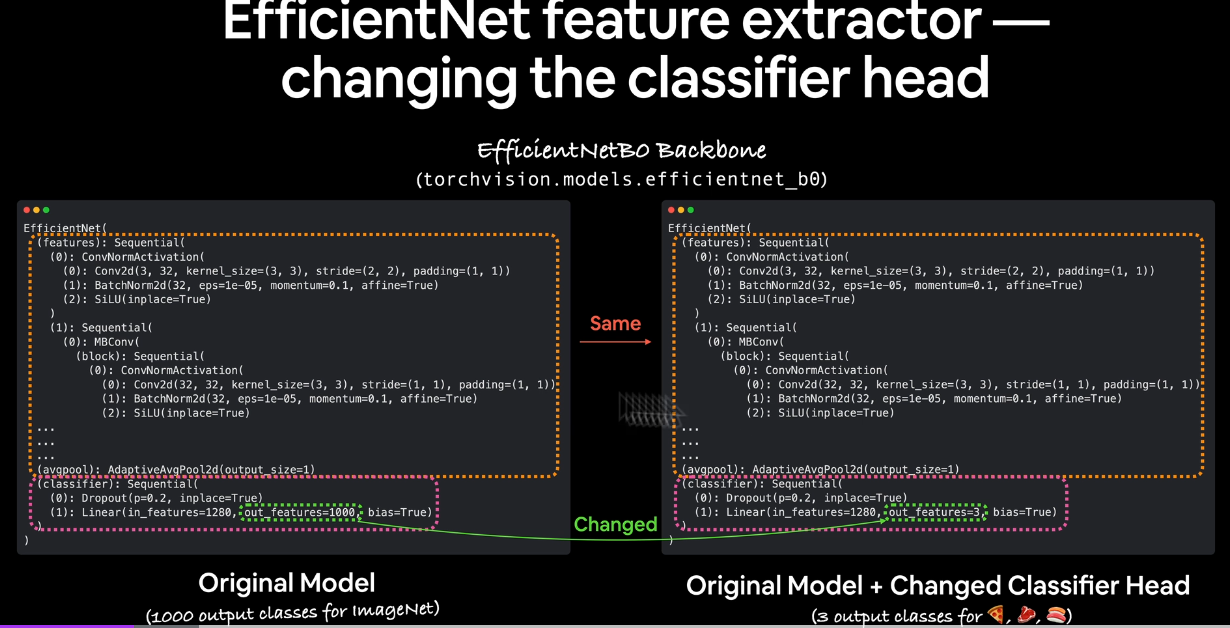

#### 7. Let's Train our EffNetB0 Feature Extraction Model

**Trainable params - in = 1280, out = 3, Hence, 1280 x 3 + 3 = 3843 Trainalble Params**

In [25]:
# Define Loss and Optimizers

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

# Import Train function which contain Train and Test Step
from going_modular.going_modular import engine

# Set Manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# start timer
from timeit import default_timer as Timer

start_time = Timer()

model_results = engine.train(model=model, train_dataloader = train_dataloader, test_dataloader = test_dataloader, 
             optimizer=optimizer, loss_fn=loss_fn, epochs=10, device=device)

end_time = Timer()

total_duration = end_time - start_time

print(f"[INFO] Total training time: {total_duration:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0043 | train_acc: 0.5289 | test_loss: 0.8164 | test_acc: 0.7200
Epoch: 2 | train_loss: 0.8082 | train_acc: 0.6622 | test_loss: 0.6773 | test_acc: 0.8400
Epoch: 3 | train_loss: 0.7455 | train_acc: 0.6933 | test_loss: 0.5653 | test_acc: 0.8667
Epoch: 4 | train_loss: 0.6718 | train_acc: 0.7556 | test_loss: 0.5174 | test_acc: 0.8667
Epoch: 5 | train_loss: 0.6022 | train_acc: 0.7689 | test_loss: 0.4980 | test_acc: 0.8667
Epoch: 6 | train_loss: 0.6038 | train_acc: 0.7511 | test_loss: 0.4438 | test_acc: 0.8933
Epoch: 7 | train_loss: 0.5560 | train_acc: 0.8133 | test_loss: 0.4391 | test_acc: 0.8533
Epoch: 8 | train_loss: 0.5112 | train_acc: 0.8133 | test_loss: 0.4192 | test_acc: 0.8800
Epoch: 9 | train_loss: 0.5869 | train_acc: 0.7422 | test_loss: 0.3982 | test_acc: 0.9067
Epoch: 10 | train_loss: 0.5521 | train_acc: 0.7867 | test_loss: 0.4031 | test_acc: 0.8800
[INFO] Total training time: 15.319 seconds


In [26]:
model_results

{'train_loss': [1.0042512392997742,
  0.8081726396083831,
  0.7454843578735987,
  0.6718140584230423,
  0.6021973474820455,
  0.6038483165701231,
  0.5559939781824748,
  0.5112120330830415,
  0.586904536485672,
  0.5521293154607216],
 'train_acc': [0.5288888888888886,
  0.662222222222222,
  0.693333333333333,
  0.7555555555555552,
  0.7688888888888885,
  0.7511111111111107,
  0.8133333333333329,
  0.813333333333333,
  0.7422222222222221,
  0.7866666666666665],
 'test_loss': [0.816397659778595,
  0.6773016679286957,
  0.565306116938591,
  0.5174146208167076,
  0.49796815335750577,
  0.44375785857439043,
  0.43913695484399795,
  0.419230509698391,
  0.3981867980957031,
  0.40308170557022094],
 'test_acc': [0.72,
  0.8400000000000002,
  0.8666666666666667,
  0.8666666666666667,
  0.8666666666666668,
  0.8933333333333333,
  0.8533333333333334,
  0.88,
  0.9066666666666667,
  0.8800000000000001]}

#### 8. Let's Evaluate our EffNetB0 Feature Extraction Model

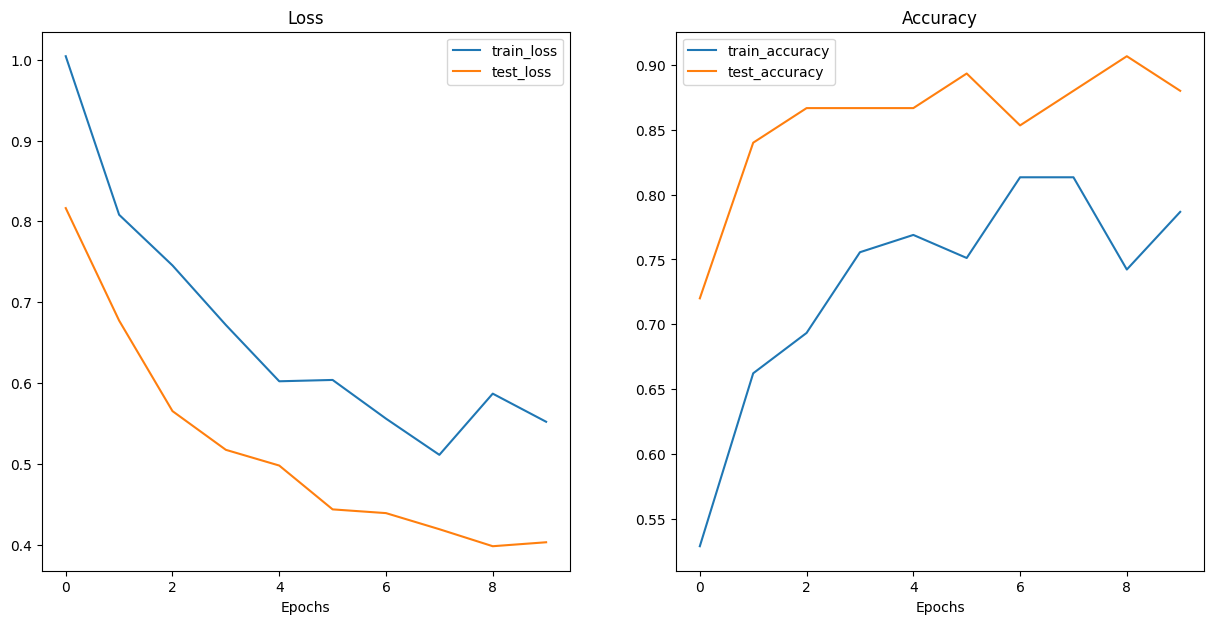

In [27]:
from helper_functions import plot_loss_curves

plot_loss_curves(model_results)

#### 9. Let's Make Predictions on test data - B0 Feature Extraction Model
- Lets visualize, visualize , visualize.
- We have to make sure that test/custom data is -
    - same shape - images need to be same shape as model was trained on
    - same datatype - custom data should be in the same data type
    - same device - custom data/test data should be on the same device
    - same transform - if you transformed your cutsom data, ideally you will transform the test data and custom data the same.

 #### Will create a function to all of this automatically - 'pred_and_plot_image()'
 
-  Input arguments - Trained model, a list of class names, a filepath to a target image, image size, a transform, target device
-  Open Image with torchvision/ PIL.Image.Open()
-  Create a tranform if one doesn't exist
-  Make sure model is on the target device
- Turn Model to model.eval() mode - to make sure its ready for inference()
- This will turn off nn.Droput() - drop out is turned off during inference.
- Transform the target image and make sure its dimensionality is suited for the model. (This mainly relates to batch size)
- If batch_size is 1, then we can add 1 dim by unsqueeze method()
- Make Prediction on the image, by passing it to the model.
- Convert the model's output logits to prediction probababilities - use torch.softmax()
- Convert the prediction probs to prediction labels using 'torch.argmax()'
- Plot the image with matplotlib and set the title to prediction lable from the above step.

In [80]:
from typing import List, Tuple
from PIL import Image
import matplotlib.pyplot as plt

def pred_and_plot_image(model: nn.Module,
                        class_names: List[str],
                        target_img_file_path: str,
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device = device
                        ):
    # 1. Load in image and convert the tensor values to float32
    target_image = Image.open(str(target_img_file_path))
    print(target_image.size)
    
    # 2. No need Normalize, the transform would do that.

    # 3. Transform if necessary
    if transform:
        image_transform = transform
    else:
        print("auto Tranfrom is used")
        image_transform = weights.transforms()

        # image_transform = transforms.Compose([
        #     transforms.Resize(image_size),
        #     transforms.ToTensor(),
        #     transforms.Normalize(mean=[0.485, 0.456, 0.406],
        #                          std=[0.229, 0.224, 0.225]),
        # ])

    model.to(device)
    model.eval()

    with torch.inference_mode():

        # 4. Add an extra dimension to the image
        transformed_image = image_transform(target_image).unsqueeze(dim=0)

        # 5. Make a prediction on image with an extra dimension and send it to the target device
        # 5. forward pass
        target_image_pred = model(transformed_image.to(device))

    # 6. Converts logits to prediction probabilities.
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities to prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    label = class_names[target_image_pred_label]

    # 8. plot the image with predicted lable on top
    plt.figure()
    plt.imshow(target_image)
    plt.title(label)
    plt.axis(False)

In [81]:
from pathlib import Path
data_path = Path("data/")
custom_image_path = data_path / "pizza.png"
# print(custom_image_path)

# custom_uint8_img = Image.open(str(custom_image_path))
# custom_uint8_img.shape

In [82]:
custom_image_path
dad_img = data_path / "04-pizza-dad.jpeg"

(3024, 4032)
auto Tranfrom is used


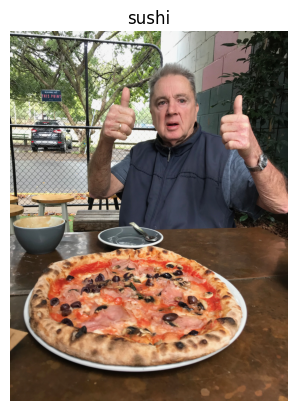

In [83]:
# Pred on our custom image
pred_and_plot_image(model=model,
                    target_img_file_path=str(dad_img),
                    class_names=class_names)

Done!